<a href="https://colab.research.google.com/github/skj092/DLCVNLP/blob/main/Practical_Assignment2_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM : Image Classification with Stanford Dogs Dataset

`The Stanford Dogs dataset contain images of 120 breeds of dogs from around the world. This dataset has been built using iage and annotation from ImageNet for the tast of fine-grained image categorization. Contents of this dataset:`



*   Number of categories: 120
*   Number of images: 20,580
*   Annotations: Class labels, Bounding boxes


**Dataset Link :-**: http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

**Annotations Link :-**  http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar

**Task:-**`Create a Web Application using Flask. Use the end user should be able
to upload an image and get results with the prediction score.`

In [ ]:
## Downloading the datasets
!wget "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
!wget "http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar"

--2021-06-10 06:46:29--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  12.8MB/s    in 59s     

2021-06-10 06:47:28 (12.9 MB/s) - ‘images.tar’ saved [793579520/793579520]

--2021-06-10 06:47:28--  http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21852160 (21M) [application/x-tar]
Saving to: ‘annotation.tar’

annotation.tar      100%[===================>]  20.84M  6.37MB/s    in 3.3s    

2021-06-10 06:47:32 (6.37 MB/s) - ‘annotat

In [ ]:
# Extracting data
! tar -xvf images.tar
! tar -xvf annotation.tar

# Testing

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_size = (224, 224)
batch_size = 64

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Images/",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Images/",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


# Visualizing Data

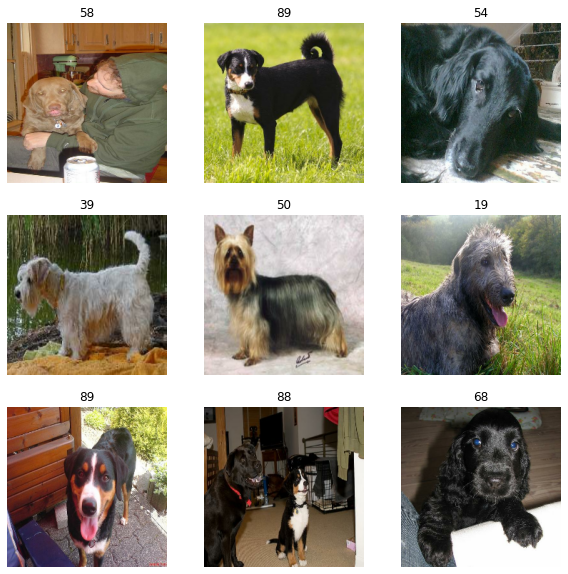

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

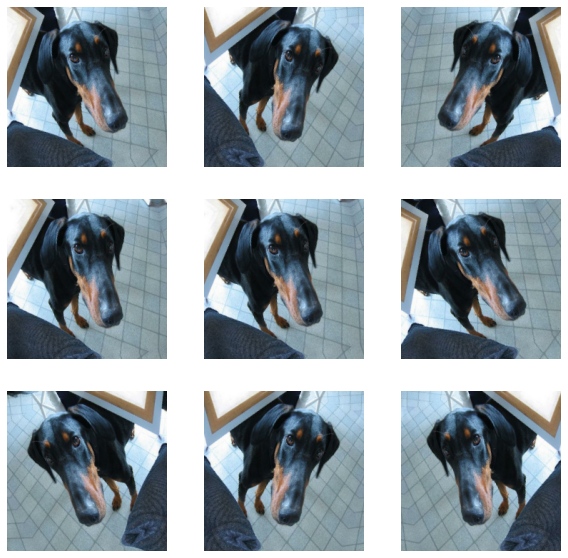

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [ ]:
tf.random.set_seed(42)
# np.random.seed(42)

LAYERS = [ tf.keras.layers.Flatten(input_shape = [224, 224]),
          tf.keras.layers.Dense(224*224, kernel_initializer='he_normal'),
          tf.keras.layers.LeakyReLU(),
          tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
          tf.keras.layers.LeakyReLU(),
          tf.keras.layers.Dense(120, activation='softmax')]
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
model.compile(loss="cross_entro",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

NameError: ignored

In [ ]:
model.summary()

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds, verbose=2)

NameError: ignored